154800
154800
8.229602316456972


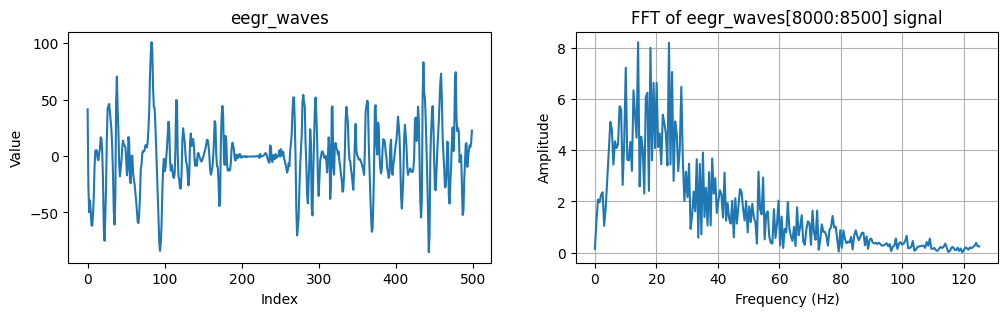

3.8194380374693235


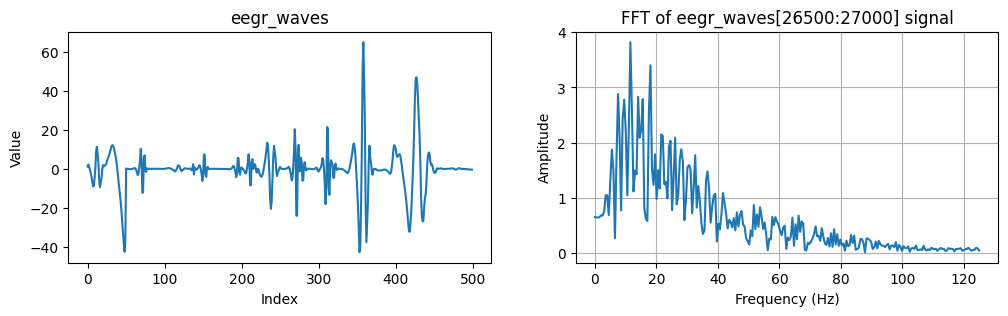

3.9176370695638703


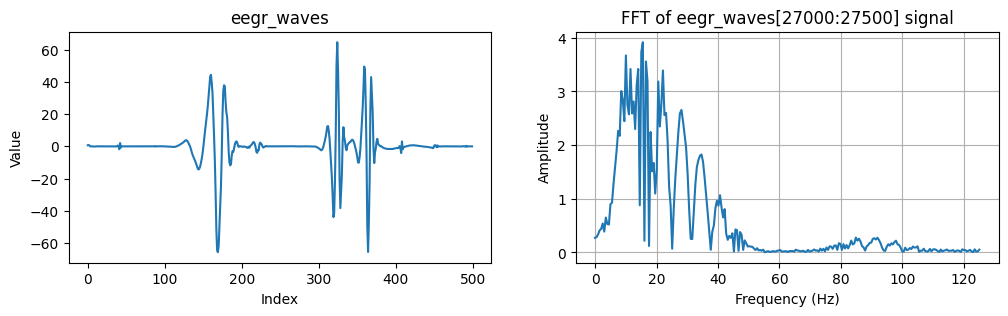

2.816509685397384


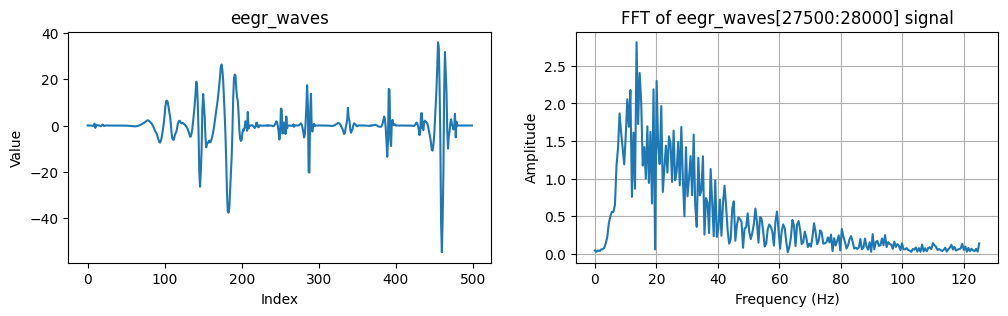

1.8473977725342605


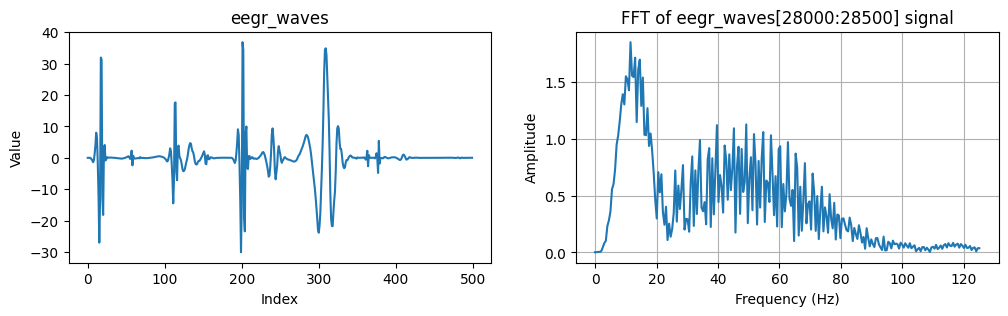

4.070517433202838


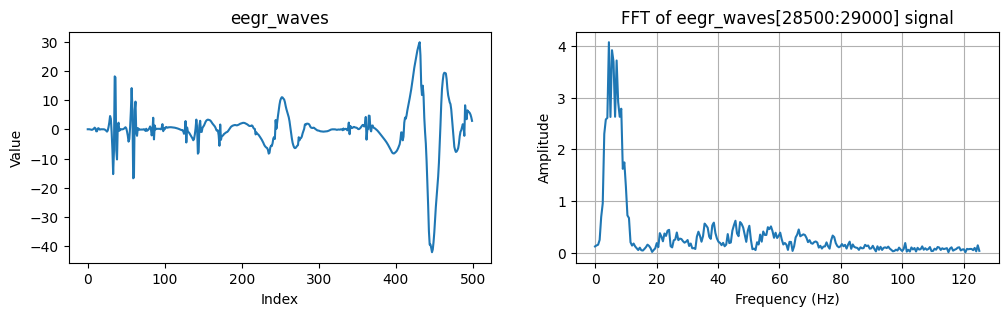

4.217116540836651


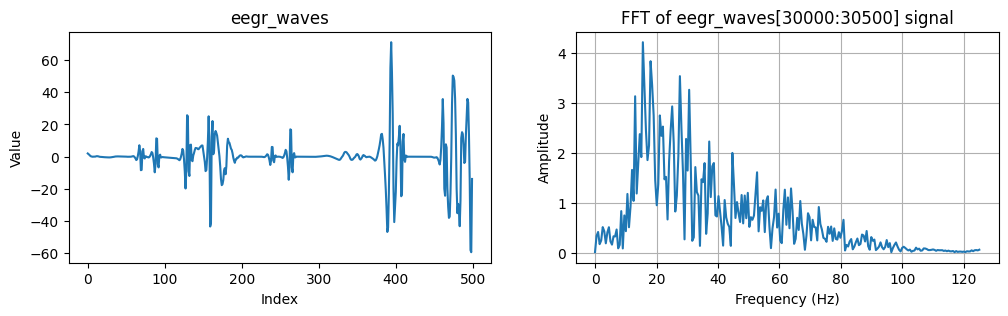

4.7839534769778185


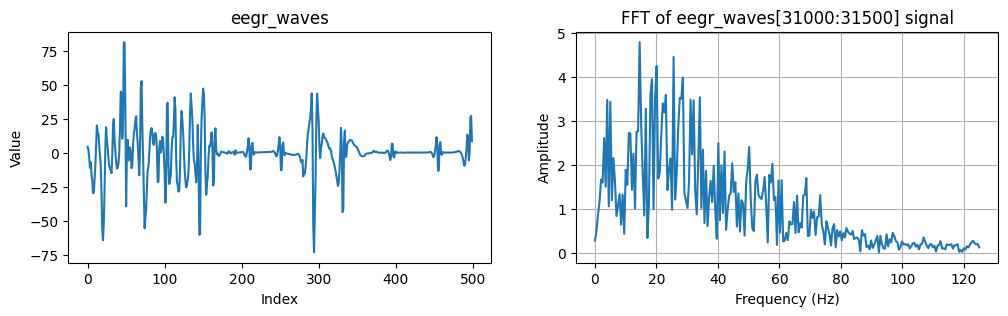

3.039190356074517


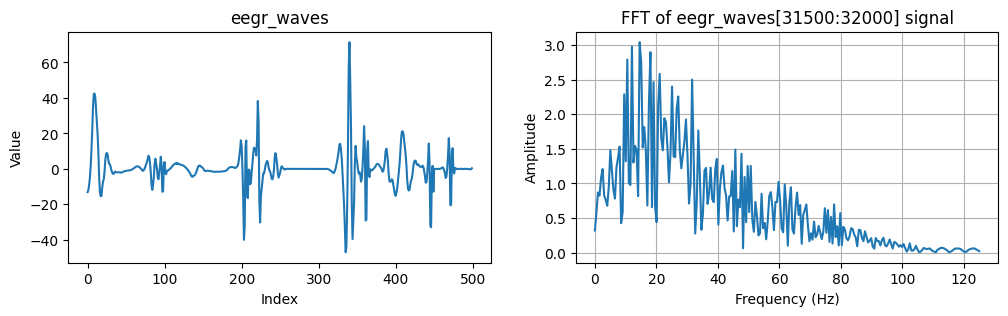

1.1691183579111875


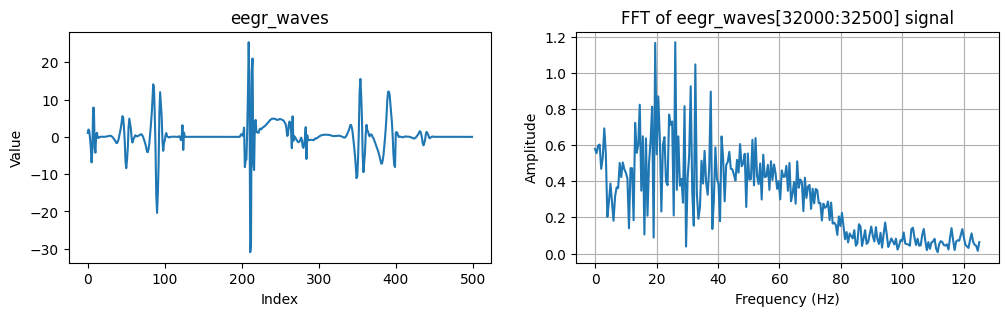

2.1443283050762507


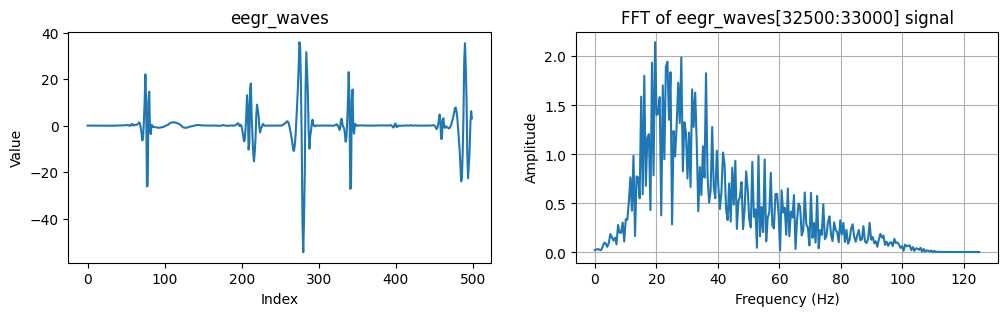

3.062950698785621


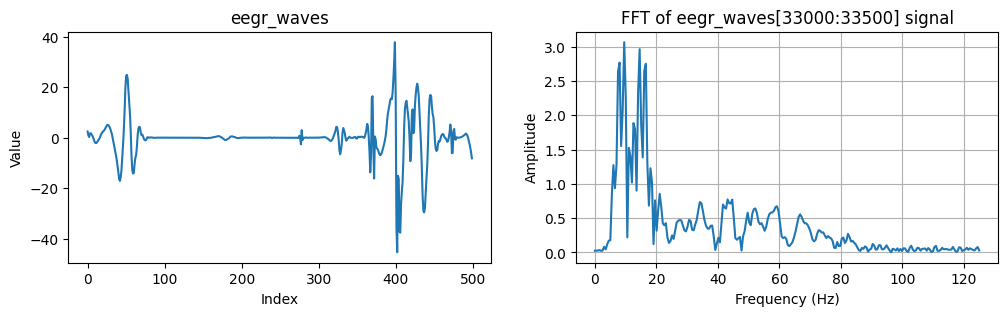

3.1358530956600292


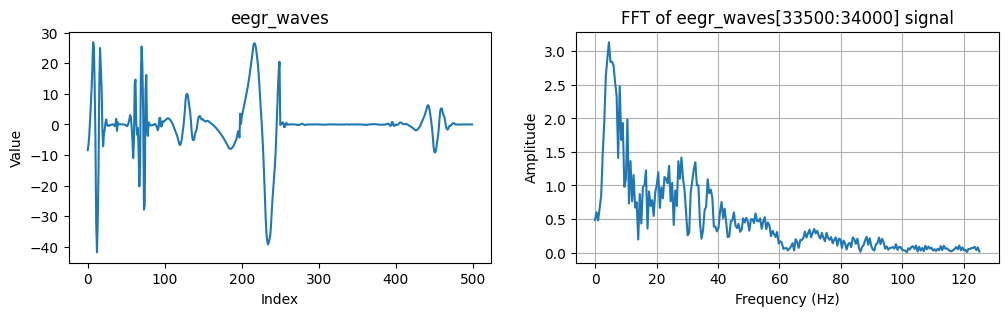

8.576703314290459


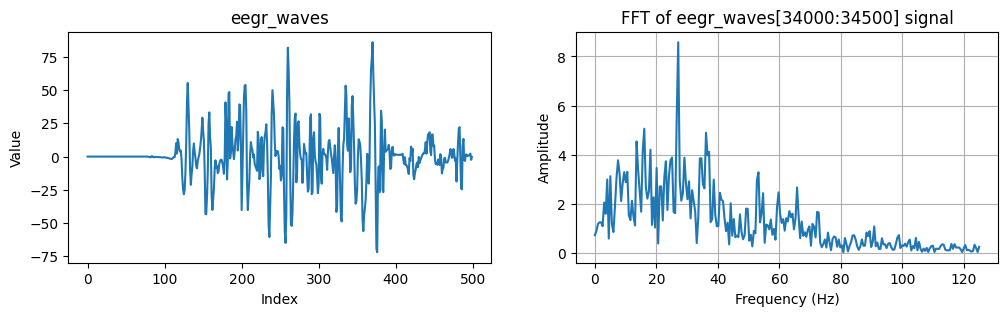

7.731836927407699


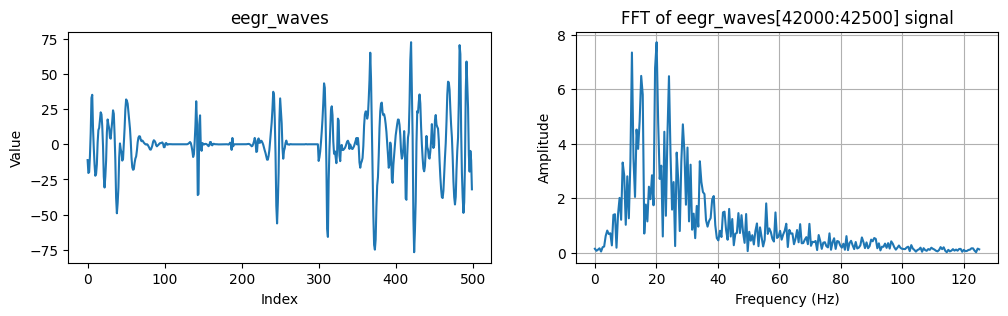

2.6979452331208673


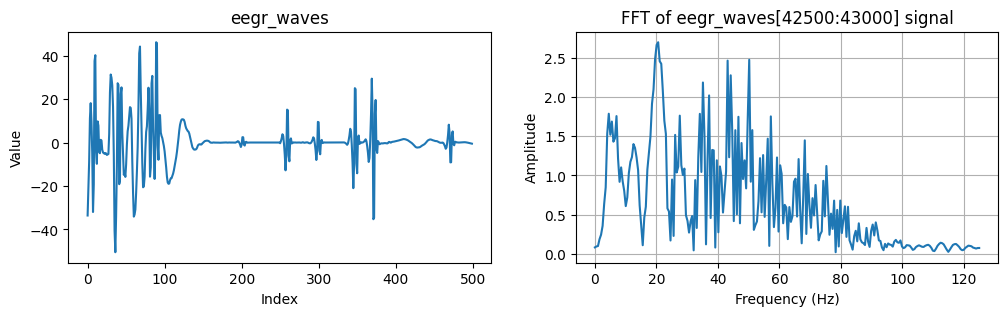

4.2795950595173124


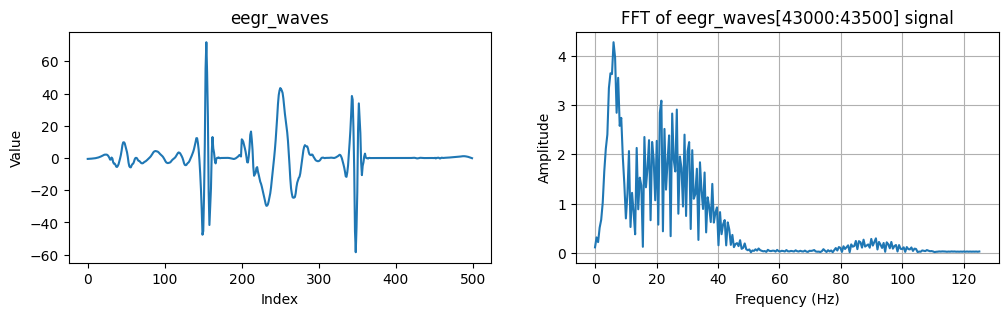

5.591123128812955


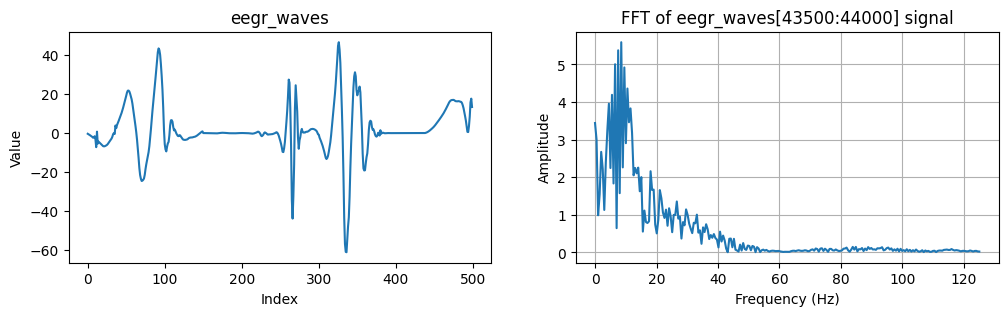

5.125696827715458


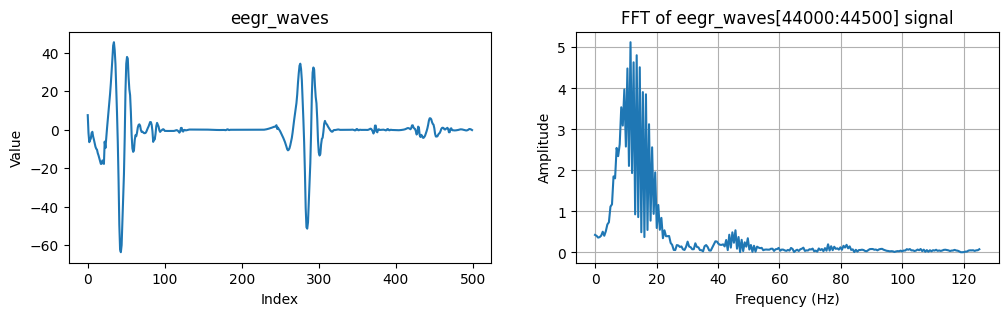

1.5794037717996363


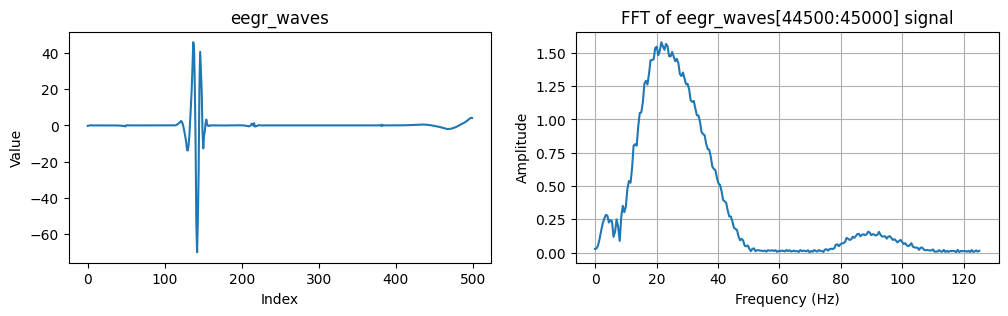

3.8655959037072187


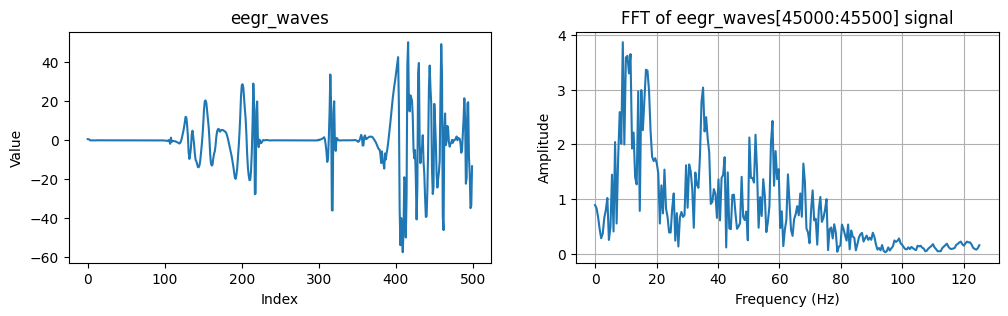

6.315617409626093


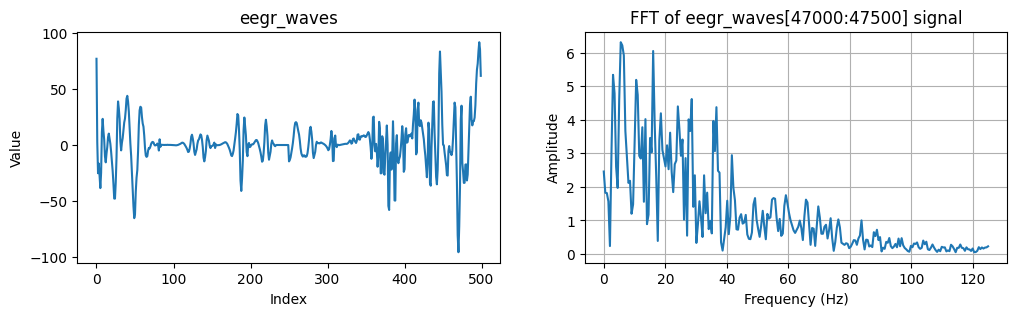

4.298905605809063


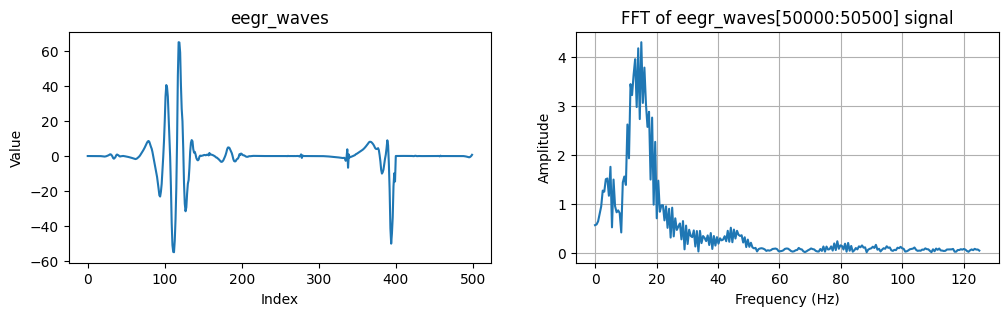

2.99524760452776


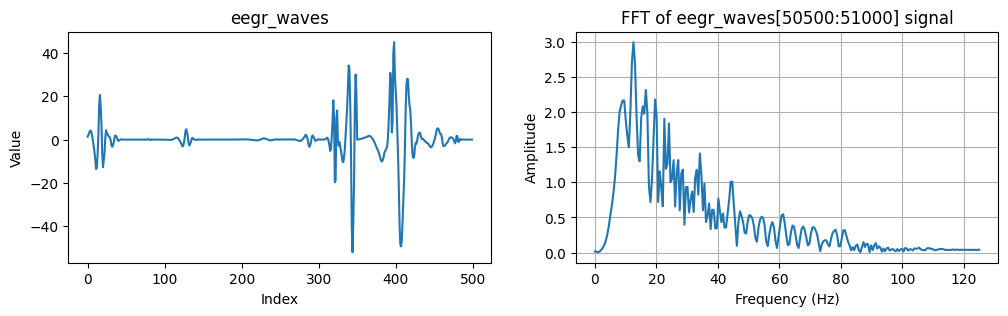

2.0941199385698477


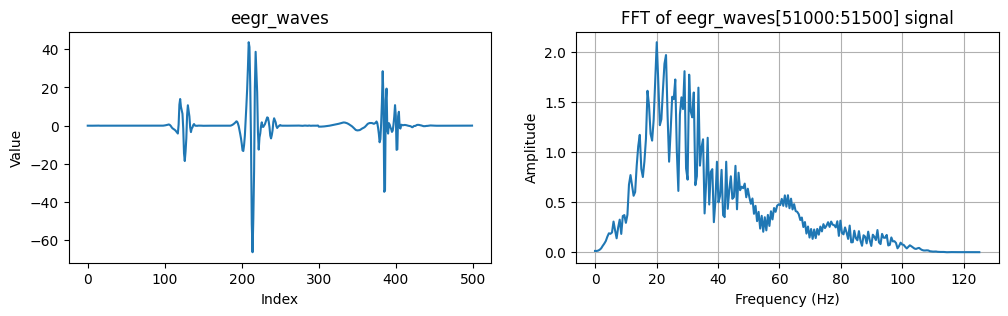

1.9525071745303322


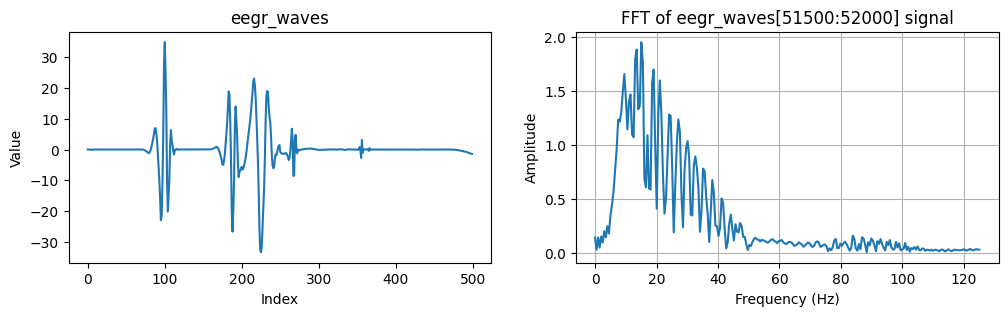

0.9397756731466969


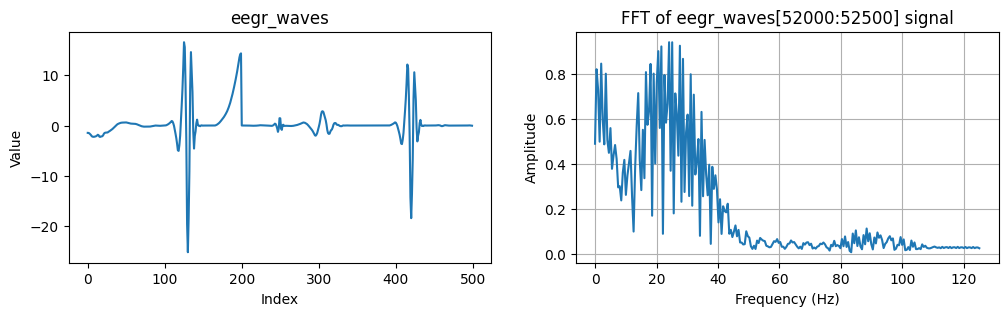

2.406005483367954


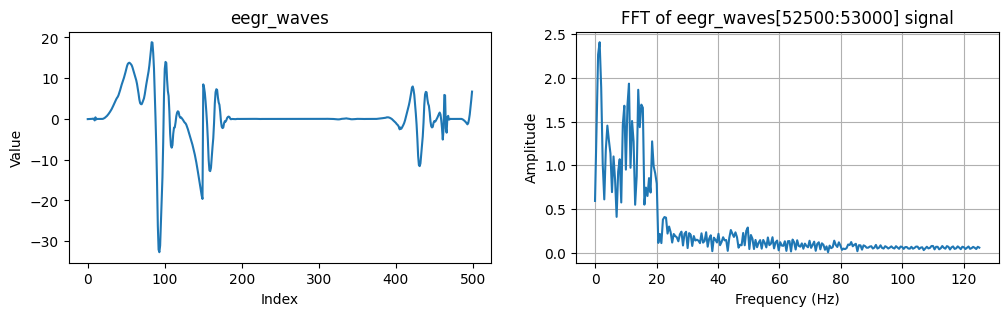

6.456378440084032


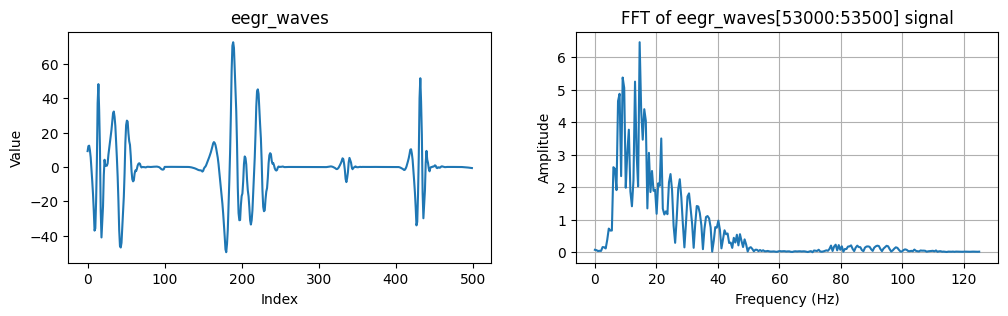

4.155059612612073


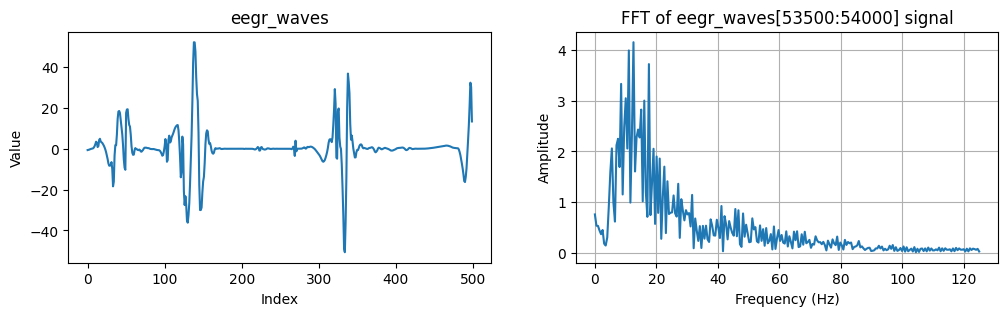

4.798586681763372


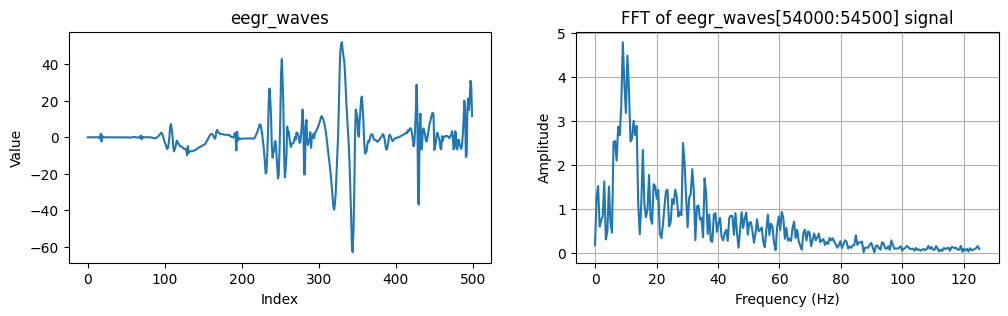

8.468205966615814


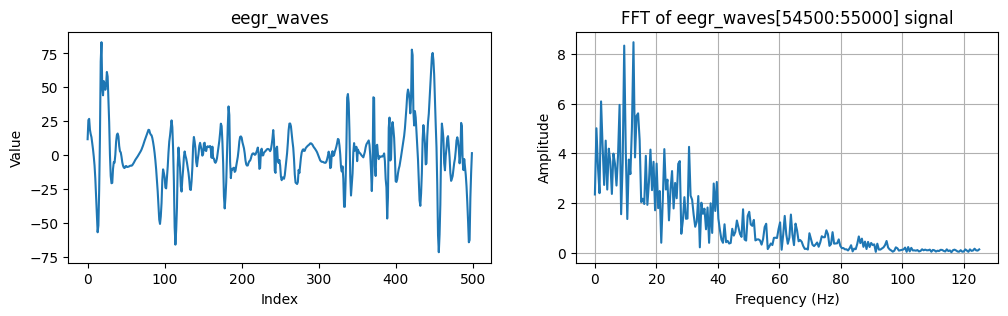

5.041445163643278


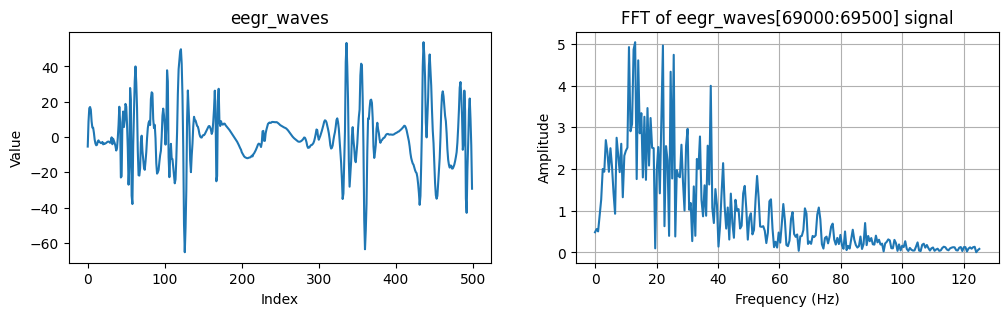

8.86812454011189


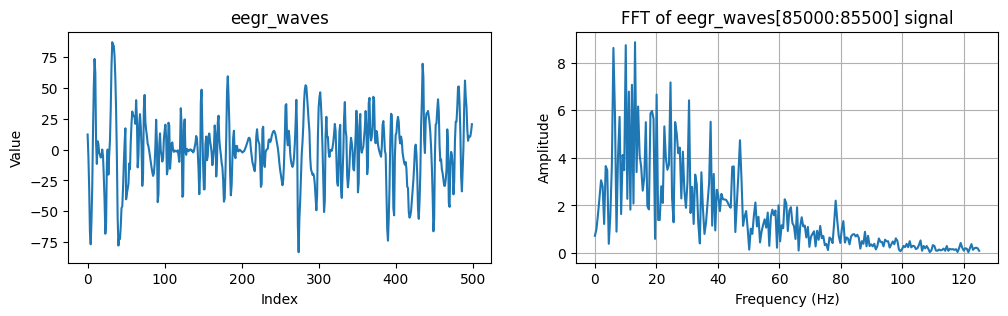

5.381864560773298


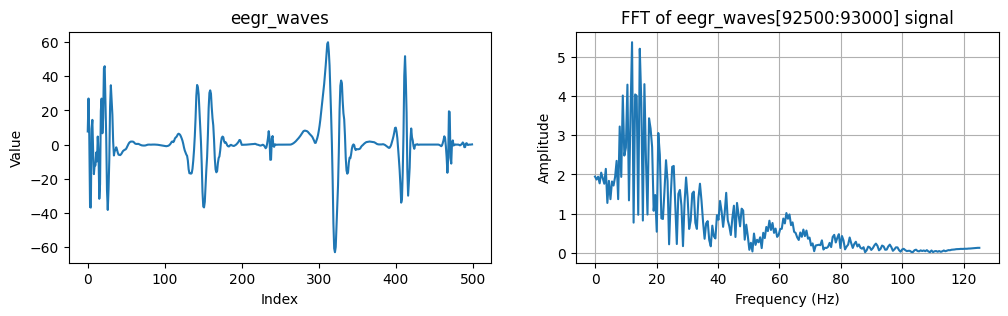

7.16057801116803


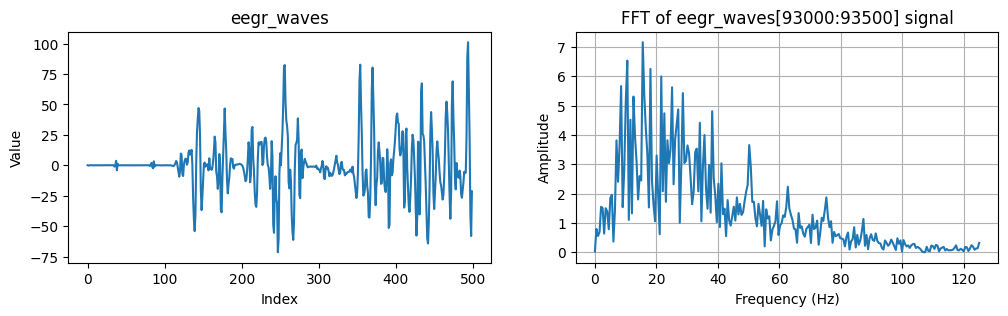

6.996592166124258


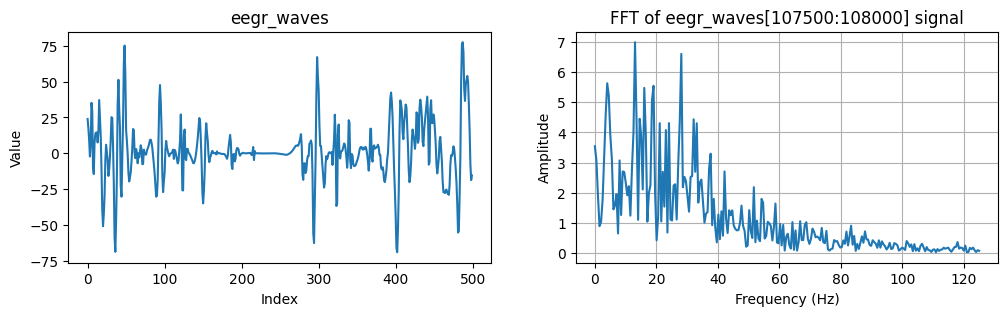

7.791119201470091


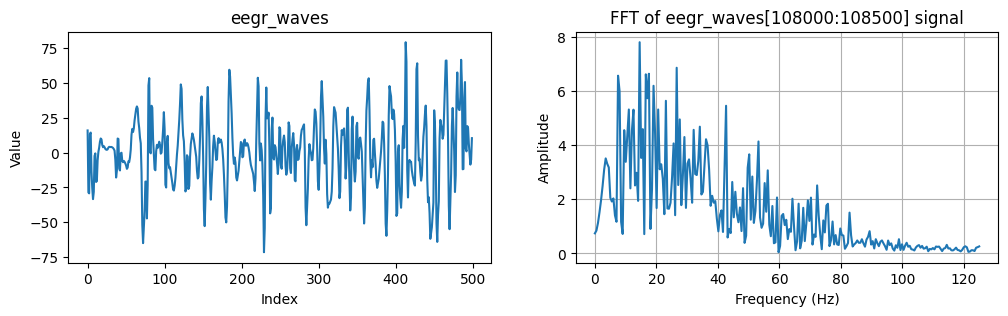

3.0645764788530268


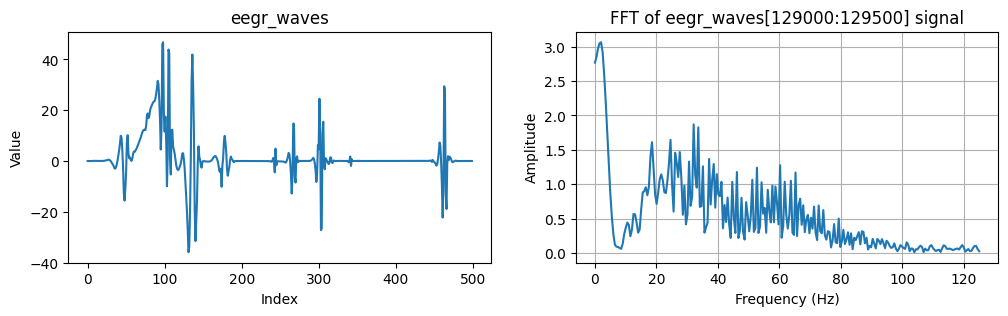

3.2607144985705783


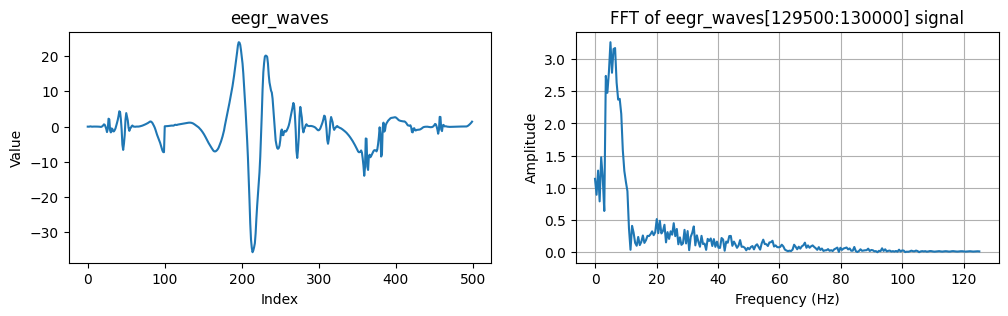

7.43181869572846


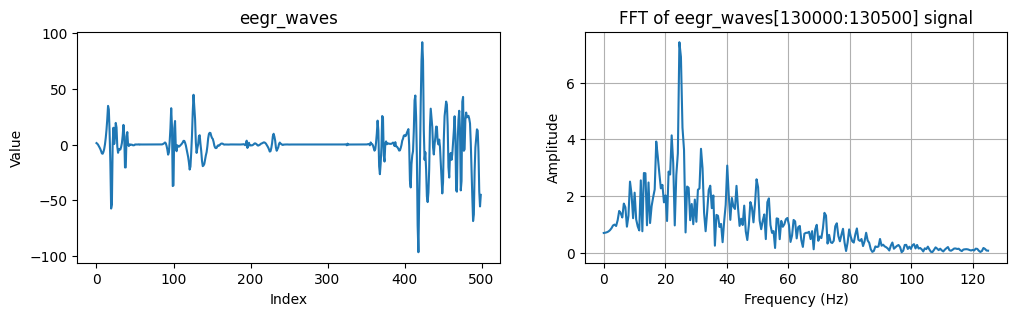

3.403783348700935


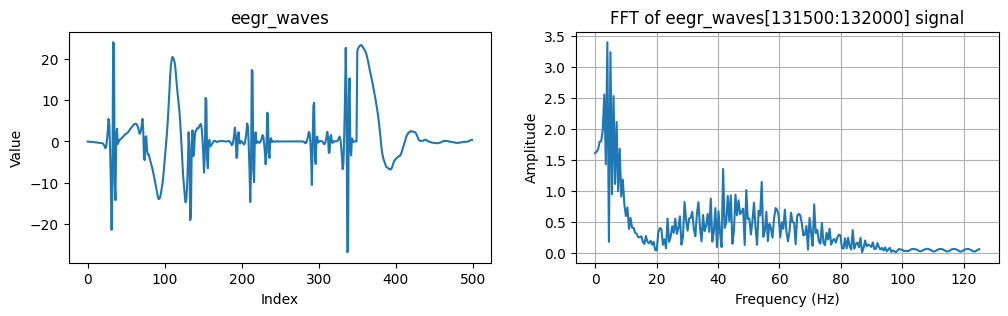

4.708576805895552


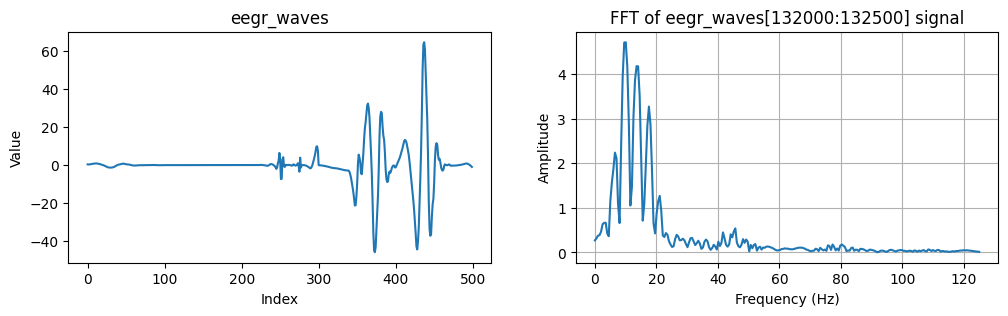

5.211602332228308


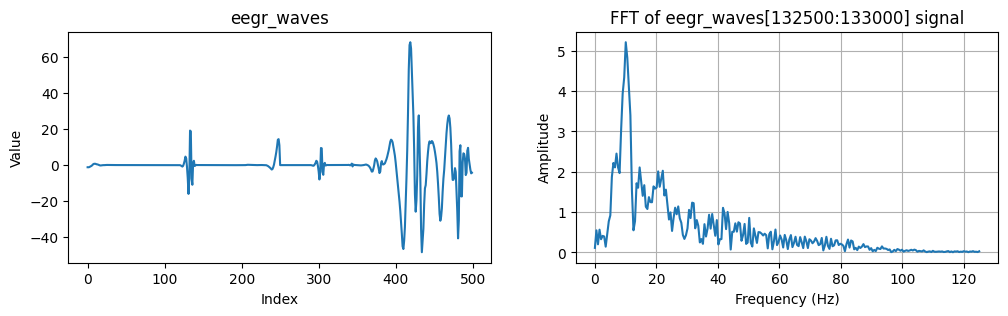

8.26852669787707


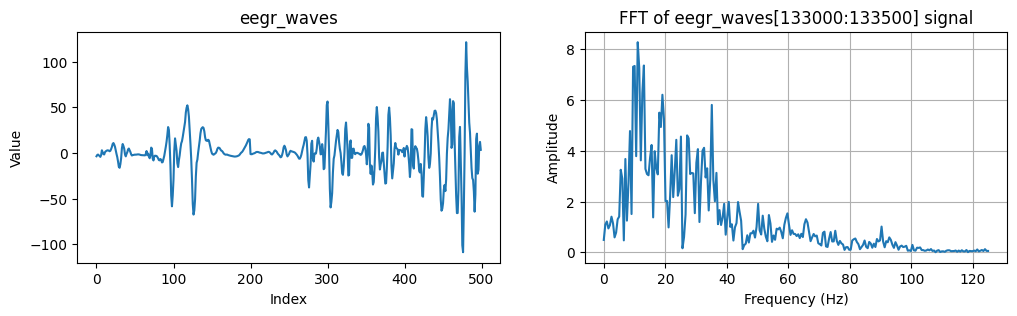

6.565466752700568


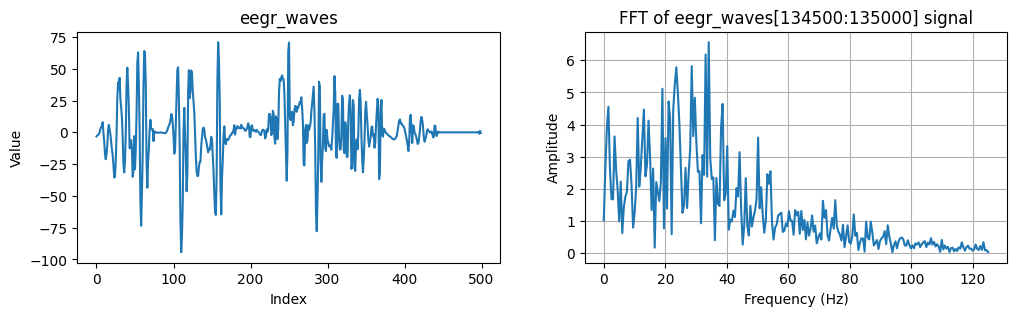

3.565486054397799


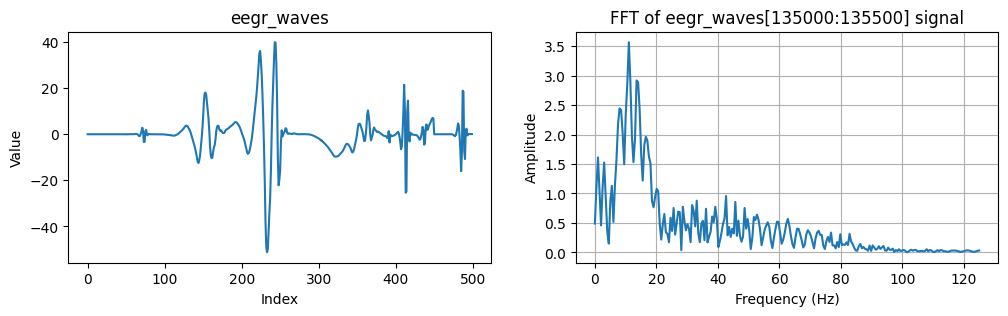

4.449821047505436


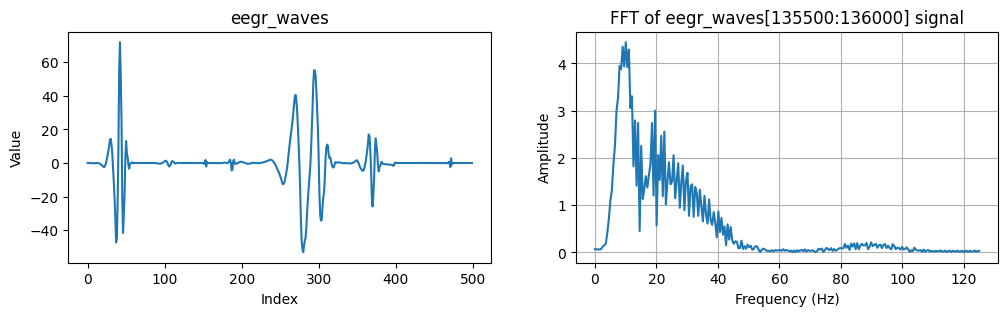

8.9461675803817


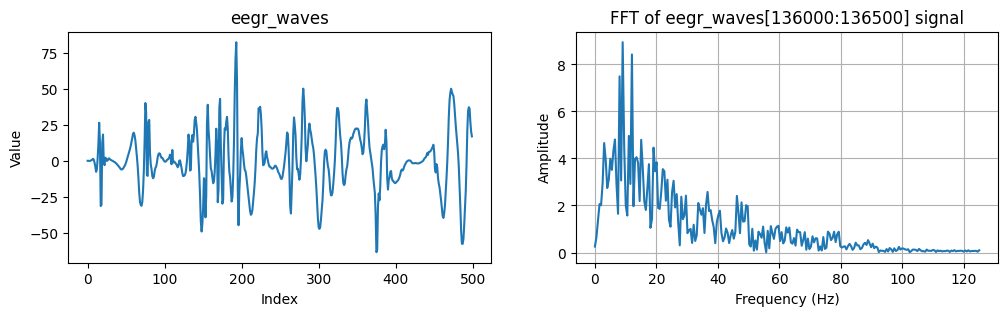

7.282851015719589


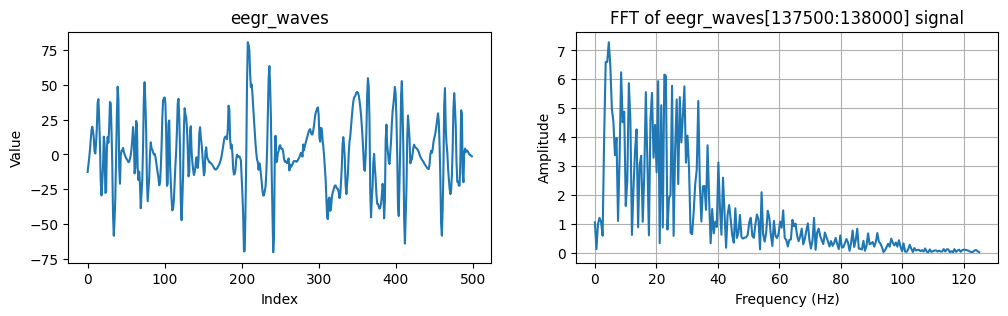

4.301488200914665


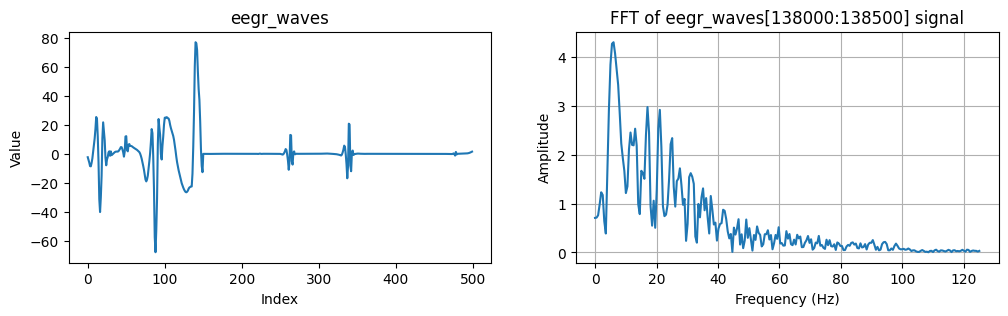

8.726818341629205


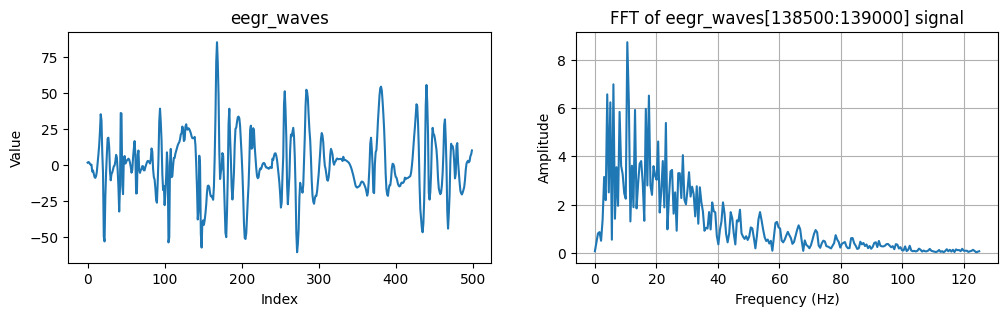

8.232417186547785


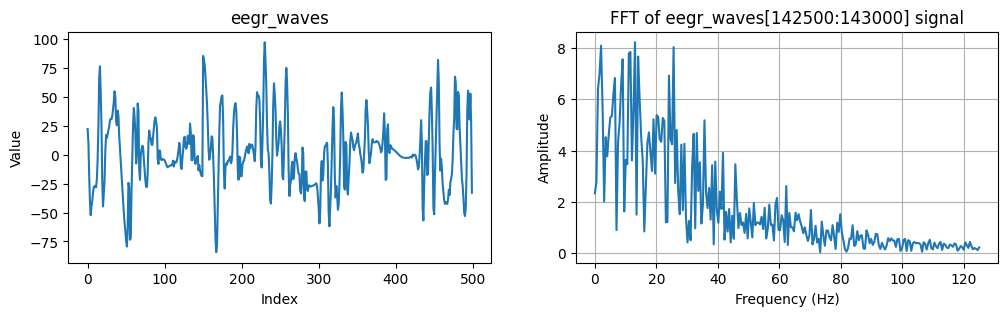

7.474237070500859


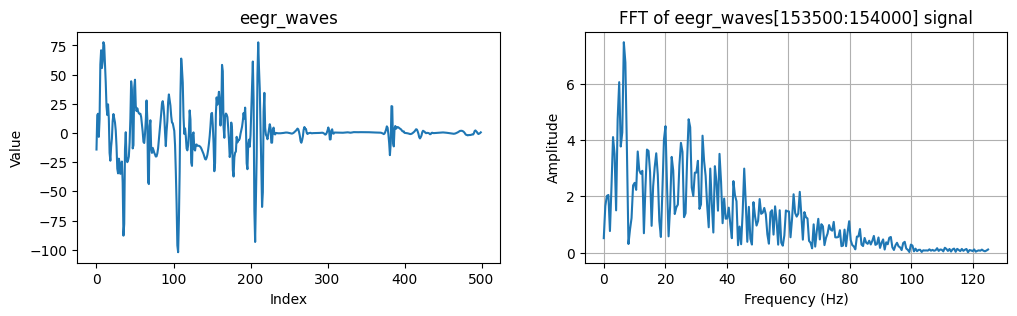

8.233224111593616


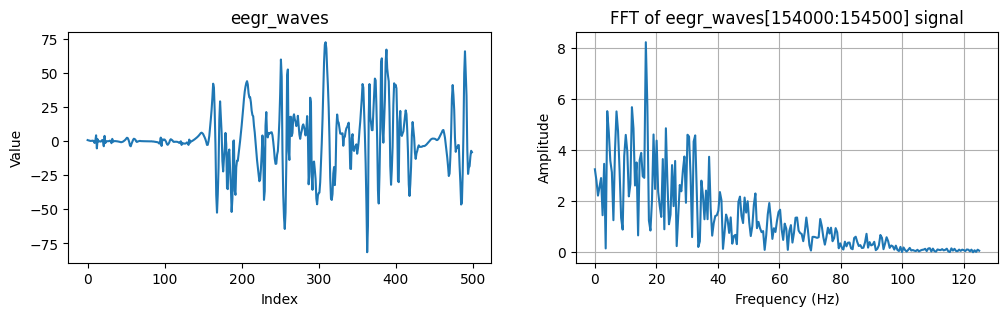

In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.fftpack import fft

file_path = 'A21_EEG.json'

eegl_waves = []
eegr_waves = []

# 确保文件存在
if os.path.exists(file_path):
    # 打开并读取JSON文件
    with open(file_path, 'r') as file:
        data = json.load(file)
        # 检查'ProcessedDatas'是否在数据中
        if 'ProcessedDatas' in data:
            # 遍历ProcessedDatas中的每一项
            for item in data['ProcessedDatas']:
                # 仅当LeftWave和RightWave不全为0时，将其添加到列表中
                if not all(value == 0 for value in item['LeftWave']):
                    eegl_waves.extend(item['LeftWave'])
                if not all(value == 0 for value in item['RightWave']):
                    eegr_waves.extend(item['RightWave'])

print(len(eegl_waves))
print(len(eegr_waves))

# 对信号进行筛选，筛选条件是np.max(np.max(2.0/N * np.abs(yf[:N//2]))) < 9，即频谱中最大值小于9，发现这些信号存在问题

for i in range(0, len(eegr_waves)//500):

    # 生成示例信号
    fs = 250  # 采样频率为250Hz
    t = np.arange(0, 2.0, 1/fs)  # 时间矢量，持续时间为2秒
    x = eegr_waves

    # 对eegr_waves[0:500]部分信号做傅里叶变换
    N = 500  # 取样点数
    yf = fft(x[i*N:(i+1)*N])
    xf = np.linspace(0.0, fs/2.0, N//2)

    if np.max(np.max(2.0/N * np.abs(yf[:N//2]))) < 9:

        print(np.max(2.0/N * np.abs(yf[:N//2])))

        plt.figure(figsize=(12, 3))

        # Plot the time domain signal
        plt.subplot(1, 2, 1)
        plt.plot(eegr_waves[i*500:(i+1)*500])
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('eegr_waves')

        # Plot the frequency spectrum
        plt.subplot(1, 2, 2)
        # 绘制傅里叶变换图像
        plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
        plt.grid()
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.title(f'FFT of eegr_waves[{i*500}:{(i+1)*500}] signal')
        plt.show()

        plt.show()